# Import Required Libraries

In [30]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load Dataset

In [31]:
# Import dataset
dataset = pd.read_csv("train.csv")


# Prepare the Dataset 

### Train a Decision Tree Classifier to obtain feature importances

In [32]:
# divide preliminary dataset set into features and labels
X = dataset.drop(columns=["label"]) # features
y = dataset['label'] # labels

# train a decision tree to obtain feature importances
clf_DT=DecisionTreeClassifier() # creating Decision Tree classifier
# split the dataset into Training and Test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2) # 80 to 20% randomly
clf_DT.fit(X_train,y_train) # fitting training data into Decision Tree Model

DecisionTreeClassifier()

### Identify columns with zero feature importances and 

In [35]:
# find feature importances
importances = clf_DT.feature_importances_ 

# identify columns where feature importances are zero
zeroCols = np.where(importances==0)

# modify the zeroCols list to match with columns in csv
zeroCols = ["pixel"+str(i) for i in zeroCols[0]]


### Eliminate 
non-important columns from the dataset

In [36]:

# remake the dataset by dropping non-important columns
newData = dataset.drop(columns=zeroCols)

# divide new dataset set into features and labels
X =newData.drop(columns=["label"]) # features
Y= newData["label"] # labels


In [37]:
# Normalize the features in order to increase accuracy
Xnorm=X/255

In [38]:
Xnorm

,pixel68,pixel71,pixel91,pixel93,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,...,pixel718,pixel720,pixel721,pixel733,pixel742,pixel743,pixel744,pixel745,pixel747,pixel774
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
41996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
41997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.25098,0.0,0.0,0.0,0.0,0.0
41998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.572549,0.929412,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0


### Prepare Feature Importance Graph

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

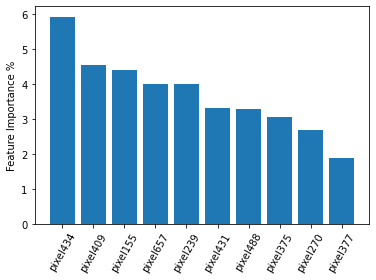

In [39]:
# Import matplotlib.pyplot for visualizing the importances
from matplotlib import pyplot as plt
# Create Importances Graph
indices = np.argsort(importances)[::-1]
#print(importances[indices][:10])
#print(indices[:10])

plt.ylabel('Feature Importance %')
plt.bar(["pixel"+str(i) for i in indices[:10]],
        importances[indices][:10]*100,
        align='center')
plt.xticks(rotation=60)


# k-Fold cross validation

In [40]:
k=5 # declare and initialize k of k-Fold
accuracy={'SVM':[],'DecTree':[],'RandomForest':[]}
for i in range(k):
  print("iteration: ",i)
  # split the dataset into Training and Test sets
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
  # create the models
  clf_DT = DecisionTreeClassifier(max_depth=10) # creating Decision Tree classifier
  clf_SVM = svm.SVC(decision_function_shape='ovo') # creating SVM classifier
  # fit training data into models
  clf_DT.fit(X_train,y_train) # fitting training data into Decision Tree Model
  clf_SVM.fit(X_train,y_train) # fitting training data into SVM model
  # make predictions for DT model using test set and note its accuracy
  prediction = clf_DT.predict(X_test) # making predictions for DT model
  accuracy['DecTree'].append("%0.4f" % accuracy_score(y_test,prediction)) # note the accuracy of DT model
  # make predictions for SVM model using test set and note its accuracy
  prediction = clf_SVM.predict(X_test) # making predictions for SVM model
  accuracy['SVM'].append("%0.4f" % accuracy_score(y_test,prediction)) # note the accuracy of SVM model
  # make predictions for RF model using test set and note its accuracy
  # accuracy['RandomForest'].append("%0.4f" % accuracy_score(y_test,prediction)) # note the accuracy of RF model
print("finished")

iteration:  0
iteration:  1
iteration:  2
iteration:  3
iteration:  4
finished


In [41]:
accuracy

{'SVM': ['0.9774', '0.9810', '0.9749', '0.9746', '0.9770'],
 'DecTree': ['0.8479', '0.8589', '0.8412', '0.8449', '0.8427'],
 'RandomForest': []}

# Normalized case

In [42]:
k=5 # declare and initialize k of k-Fold
accuracy={'SVM':[],'DecTree':[],'RandomForest':[]}
for i in range(k):
  print("iteration: ",i)
  # split the dataset into Training and Test sets
  X_train, X_test, y_train, y_test = train_test_split(Xnorm,y,test_size=0.2)
  # create the models
  clf_DT2 = DecisionTreeClassifier(max_depth=10) # creating Decision Tree classifier
  clf_SVM2 = svm.SVC(decision_function_shape='ovo') # creating SVM classifier
  # fit training data into models
  clf_DT2.fit(X_train,y_train) # fitting training data into Decision Tree Model
  clf_SVM2.fit(X_train,y_train) # fitting training data into SVM model
  # make predictions for DT model using test set and note its accuracy
  prediction = clf_DT2.predict(X_test) # making predictions for DT model
  accuracy['DecTree'].append("%0.4f" % accuracy_score(y_test,prediction)) # note the accuracy of DT model
  # make predictions for SVM model using test set and note its accuracy
  prediction = clf_SVM2.predict(X_test) # making predictions for SVM model
  accuracy['SVM'].append("%0.4f" % accuracy_score(y_test,prediction)) # note the accuracy of SVM model
  # make predictions for RF model using test set and note its accuracy
  # accuracy['RandomForest'].append("%0.4f" % accuracy_score(y_test,prediction)) # note the accuracy of RF model
print("finished")

iteration:  0
iteration:  1
iteration:  2
iteration:  3
iteration:  4
finished


In [43]:
accuracy

{'SVM': ['0.9774', '0.9783', '0.9750', '0.9737', '0.9765'],
 'DecTree': ['0.8499', '0.8499', '0.8463', '0.8462', '0.8500'],
 'RandomForest': []}

# former code

In [78]:
k=5 # declare and initialize k of k-Fold
acc_DT,acc_SVM=[None]*k,[None]*k # create lists for accuracies
print("k-Fold cross validation ")
for i in range(k):
  # split the dataset into Training and Test sets
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
  # create the models
  clf_DT = DecisionTreeClassifier(max_depth=10,random_state=1) # creating Decision Tree classifier
  clf_SVM = svm.SVC(decision_function_shape='ovr') # creating SVM classifier
  # fit training data into models
  clf_DT.fit(X_train,y_train) # fitting training data into Decision Tree Model
  clf_SVM.fit(X_train,y_train) # fitting training data into SVM model
  # make predictions for DT model using test set
  prediction = clf_DT.predict(X_test) # making predictions for DT model
  # note accuracies to the list
  acc_DT[i] = "%0.4f" % accuracy_score(y_test,prediction) # note the accuracy of DT model
  # make predictions for SVM model using test set
  prediction = clf_SVM.predict(X_test) # making predictions for SVM model
  # note accuracies to the list
  acc_SVM[i] = "%0.4f" % accuracy_score(y_test,prediction) # note the accuracy of SVM model
  print("iteration: ",i," completed.")

k-Fold cross validation 
iteration:  0  completed.
iteration:  1  completed.
iteration:  2  completed.
iteration:  3  completed.
iteration:  4  completed.
